In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [8]:
df = pd.read_excel("../data/Obesity.xlsx")


In [9]:
df.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df.shape


(2111, 17)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   int64  
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   int64  
 7   NCP             2111 non-null   int64  
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   int64  
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(4), int64(4), object(9

In [12]:
df.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [13]:
df["Obesity"].value_counts()


Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [14]:
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03,2.111000e+03
mean,1.489790e+07,1.125941e+06,5.850877e+07,8.129461e+05,6.814160e+05,1.158451e+06,4.281866e+05,1.819331e+05
std,1.307597e+07,8.014948e+05,4.976613e+07,1.136965e+06,1.182663e+06,1.096148e+06,7.632395e+05,4.893283e+05
min,1.400000e+01,1.450000e+00,3.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+01,1.830000e+00,8.000000e+01,2.000000e+00,3.000000e+00,2.000000e+00,1.245050e-01,0.000000e+00
50%,1.922326e+07,1.631547e+06,6.880369e+07,3.000000e+00,3.000000e+00,1.221281e+06,1.000000e+00,6.253500e-01
75%,2.422283e+07,1.747596e+06,1.048240e+08,2.060030e+06,1.153420e+06,2.160736e+06,1.016148e+06,1.000000e+00
max,5.513788e+07,1.975663e+06,1.650573e+08,2.998441e+06,3.999591e+06,2.999495e+06,2.999918e+06,1.990617e+06


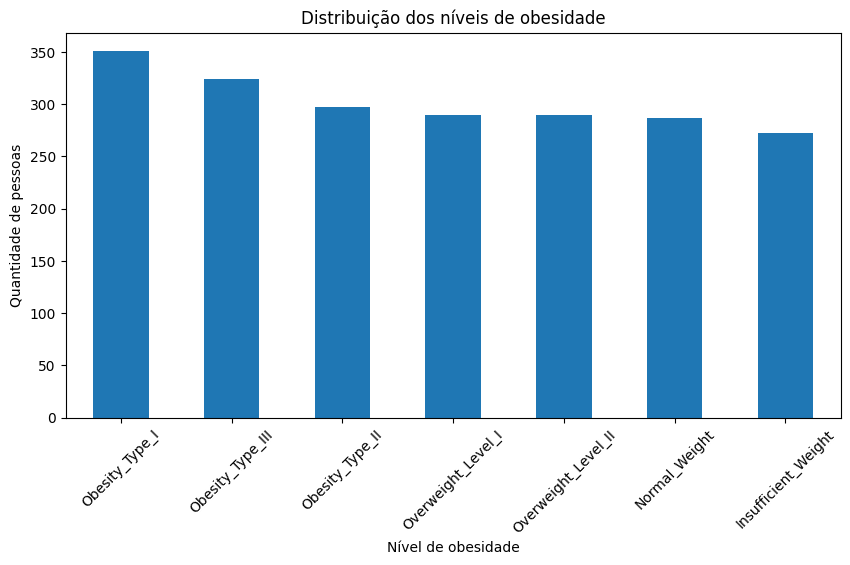

In [15]:
plt.figure(figsize=(10,5))
df["Obesity"].value_counts().plot(kind="bar")
plt.title("Distribuição dos níveis de obesidade")
plt.xlabel("Nível de obesidade")
plt.ylabel("Quantidade de pessoas")
plt.xticks(rotation=45)
plt.show()


In [16]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)
#cálculo IMC - A fórmula utilizada foi: IMC = Peso / (Altura²)



In [17]:
# Corrige distorções
df["Height"] = df["Height"].apply(
    lambda x: x / 1_000_000 if x > 10 else x
)


In [18]:
altura_mediana = df["Height"].median()
altura_mediana
#cálculo da mediana da altura

np.float64(1.695347)

In [19]:
df["Height"] = df["Height"].apply(
    lambda x: altura_mediana if x < 1.2 else x
)
#Tratamento de valores irreais na variável Height /correção da escala da altura, foram identificados alguns valores extremamente baixos (inferiores a 1.2 m), incompatíveis com a população adulta.

In [20]:
df[["Weight", "Height", "BMI"]].head()
#Validação da variável BMI

,Weight,Height,BMI
0,64.0,1.62,24.386526
1,56.0,1.52,24.238227
2,77.0,1.80,23.765432
3,87.0,1.80,26.851852
4,89.8,1.78,28.342381


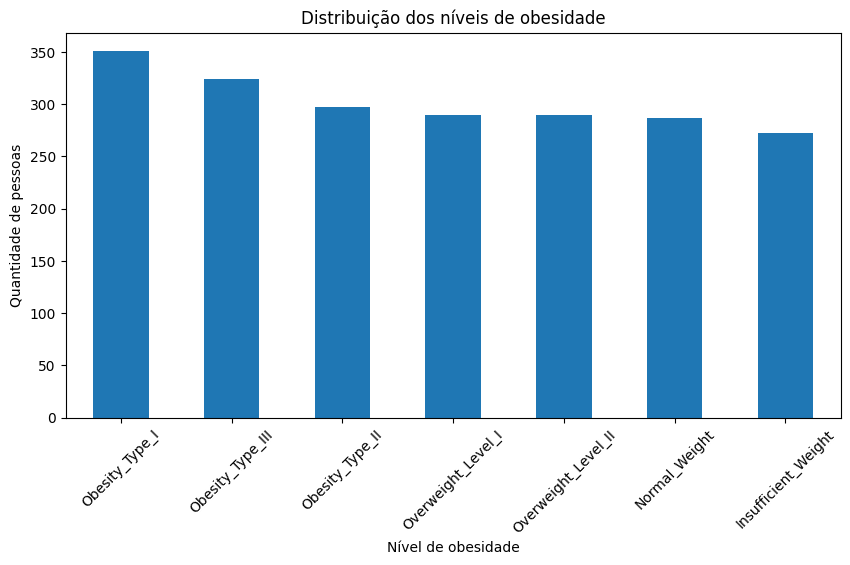

In [21]:
#Distribuição dos níveis de obesidade / O gráfico de barras mostra a quantidade de pessoas em cada nível de obesidade.
plt.figure(figsize=(10,5))
df["Obesity"].value_counts().plot(kind="bar")
plt.title("Distribuição dos níveis de obesidade")
plt.xlabel("Nível de obesidade")
plt.ylabel("Quantidade de pessoas")
plt.xticks(rotation=45)
plt.show()


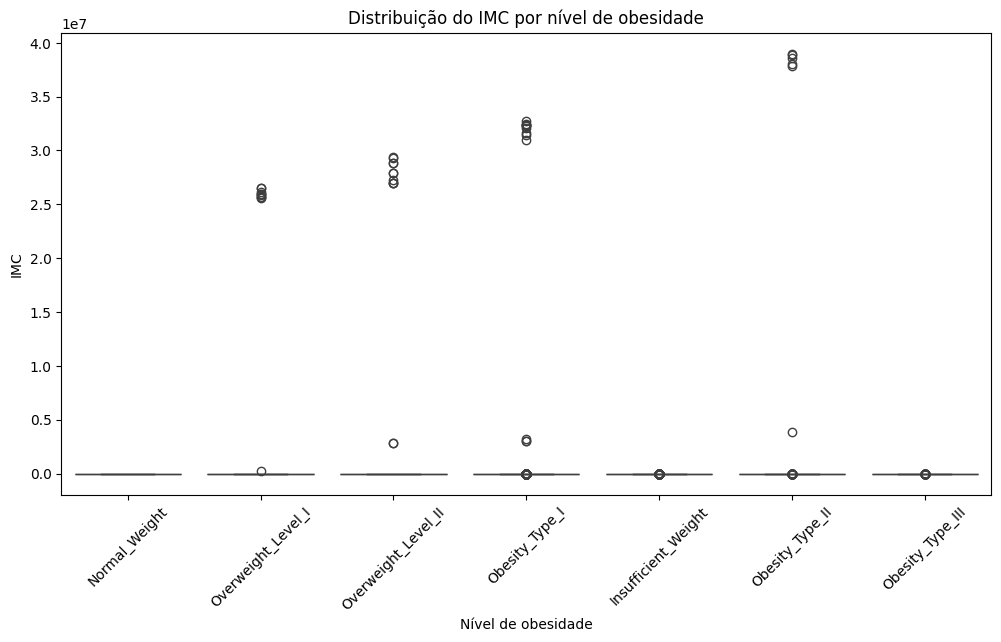

In [22]:
#IMC (BMI) por nível de obesidade / gráfico boxplot mostra a distribuição do IMC para cada nível de obesidade.
plt.figure(figsize=(12,6))
sns.boxplot(x="Obesity", y="BMI", data=df)
plt.title("Distribuição do IMC por nível de obesidade")
plt.xlabel("Nível de obesidade")
plt.ylabel("IMC")
plt.xticks(rotation=45)
plt.show()


In [23]:
df["Height"].describe()


count    2111.000000
mean        1.700169
std         0.090195
min         1.450000
25%         1.633841
50%         1.695347
75%         1.761646
max         1.980000
Name: Height, dtype: float64

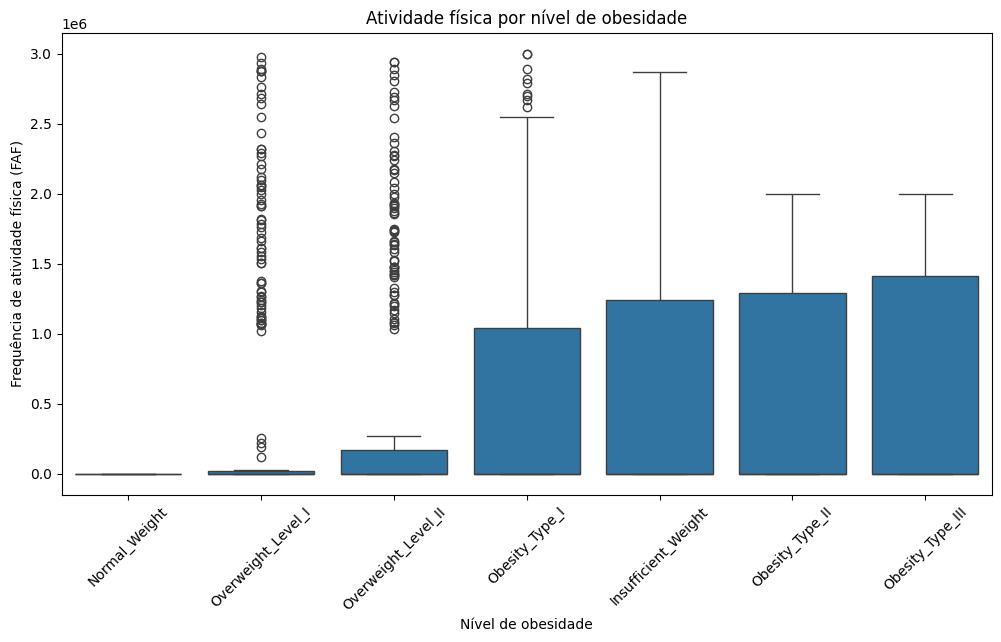

In [24]:
#FAF x Obesidade / hipótese : pessoas com maior frequência de atividade física tendem a ter níveis mais baixos de obesidade.
plt.figure(figsize=(12,6))
sns.boxplot(x="Obesity", y="FAF", data=df)
plt.title("Atividade física por nível de obesidade")
plt.xlabel("Nível de obesidade")
plt.ylabel("Frequência de atividade física (FAF)")
plt.xticks(rotation=45)
plt.show()


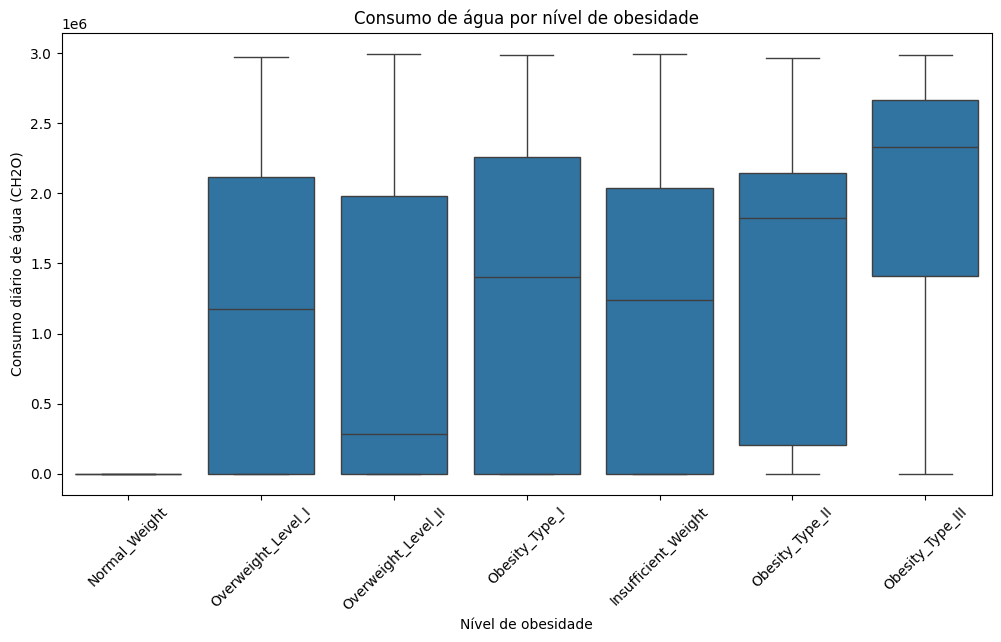

In [25]:
#Consumo de água (CH2O) por nível de obesidade / hipótese: o consumo diário de água pode variar conforme o nível de obesidade.
plt.figure(figsize=(12,6))
sns.boxplot(x="Obesity", y="CH2O", data=df)
plt.title("Consumo de água por nível de obesidade")
plt.xlabel("Nível de obesidade")
plt.ylabel("Consumo diário de água (CH2O)")
plt.xticks(rotation=45)
plt.show()


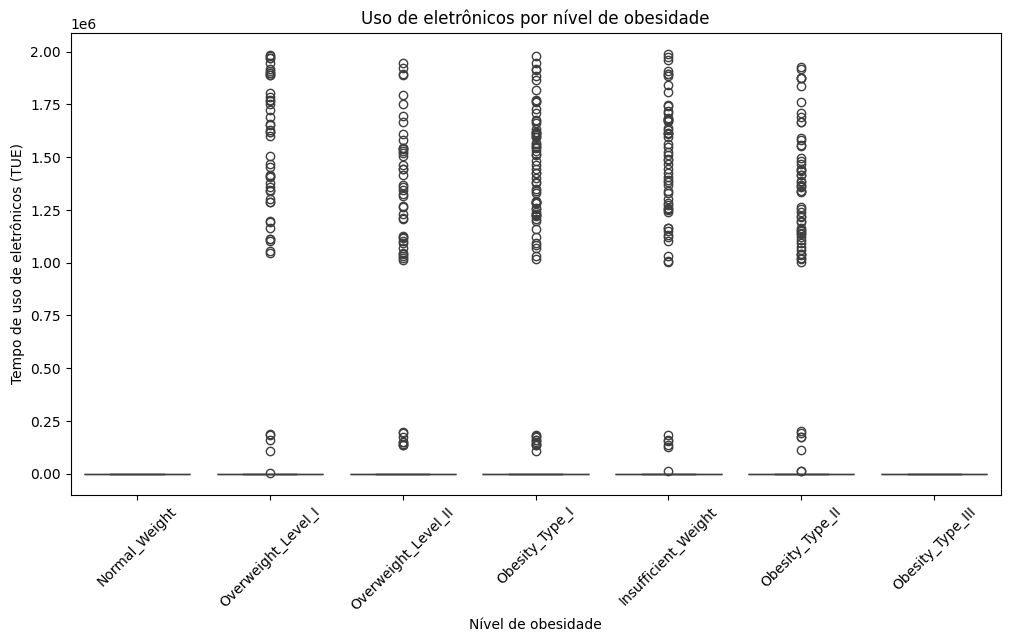

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Obesity", y="TUE", data=df)
plt.title("Uso de eletrônicos por nível de obesidade")
plt.xlabel("Nível de obesidade")
plt.ylabel("Tempo de uso de eletrônicos (TUE)")
plt.xticks(rotation=45)
plt.show()


In [27]:
#Separação entre features e target / As variáveis explicativas (X) contêm os dados do paciente. A variável alvo (y) é o nível de obesidade que o modelo irá prever.
X = df.drop("Obesity", axis=1)
y = df["Obesity"]


In [28]:
# identificação das colunas categóricas e numéricas
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

cat_cols, num_cols


(Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
        'MTRANS'],
       dtype='object'),
 Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'], dtype='object'))

In [29]:
#Codificação das variáveis categóricas em númericas
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

X_cat = encoder.fit_transform(X[cat_cols])




In [30]:
#padronização das variáveis numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols])


In [31]:
#junção das variáveis numéricas e categóricas processadas
import numpy as np

X_final = np.hstack([X_num, X_cat])
X_final.shape


(2111, 32)

In [32]:
#Divisão entre conjunto de treino (80%) e teste (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [34]:
#Treinamento do modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [ ]:
#Avaliação do modelo /acurácia 
from sklearn.metrics import accuracy_score

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9219858156028369

In [36]:
#Relatório de classificação
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.82      1.00      0.90        58
     Obesity_Type_I       0.84      0.93      0.88        70
    Obesity_Type_II       1.00      0.88      0.94        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.94      0.81      0.87        58
Overweight_Level_II       0.91      0.91      0.91        58

           accuracy                           0.92       423
          macro avg       0.93      0.92      0.92       423
       weighted avg       0.93      0.92      0.92       423



In [38]:
#Salvamento do modelo para uso posterior na aplicação preditiva desenvolvida em Streamlit.
import joblib

joblib.dump(rf_model, "../app/model.pkl")
joblib.dump(encoder, "../app/encoder.pkl")
joblib.dump(scaler, "../app/scaler.pkl")


['../app/scaler.pkl']